In [42]:
from app import *
plt.rcParams['figure.figsize'] = [9, 7]
%matplotlib notebook

In [2]:
app = JupyterSMV()

In [3]:
app.geojson()

In [4]:
app.ui

In [5]:
#dir(app)
#np.count_nonzero(~np.isnan(data))
app.layers

,id,lat,lon,layer,samples,points,xr
0,0,31.774734,-109.327589,<app.Layer object at 0x000001A35C53A4E0>,id lat lon ...,"LayerGroup(layers=(CircleMarker(color='white',...","[SoilSCAPE_surface, SoilSCAPE_rootzone, AirMOS..."
1,1,31.505073,-110.536967,<app.Layer object at 0x000001A35C247710>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
2,2,33.653808,-108.566810,<app.Layer object at 0x000001A35C274898>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
3,3,35.298089,-111.641646,<app.Layer object at 0x000001A35C2B3A20>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
4,4,33.996685,-108.673179,<app.Layer object at 0x000001A35C352BE0>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
5,5,34.020165,-109.401942,<app.Layer object at 0x000001A35C375630>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
6,6,47.606681,-103.517068,<app.Layer object at 0x000001A35C30FF98>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
7,7,46.752166,-103.556410,<app.Layer object at 0x000001A35C3EA2E8>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
8,8,37.714688,-106.863892,<app.Layer object at 0x000001A35C3B7908>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None
9,9,37.337869,-103.076888,<app.Layer object at 0x000001A35D94CC50>,id lat lon ...,LayerGroup(layers=(CircleMarker(fill_color='bl...,None


In [6]:
layer0 = app.layers.iloc[0]
layer0

id                                                         0
lat                                                  31.7747
lon                                                 -109.328
layer               <app.Layer object at 0x000001A35C53A4E0>
samples        id        lat         lon                 ...
points     LayerGroup(layers=(CircleMarker(color='white',...
xr         [SoilSCAPE_surface, SoilSCAPE_rootzone, AirMOS...
Name: 0, dtype: object

<IPython.core.display.Javascript object>


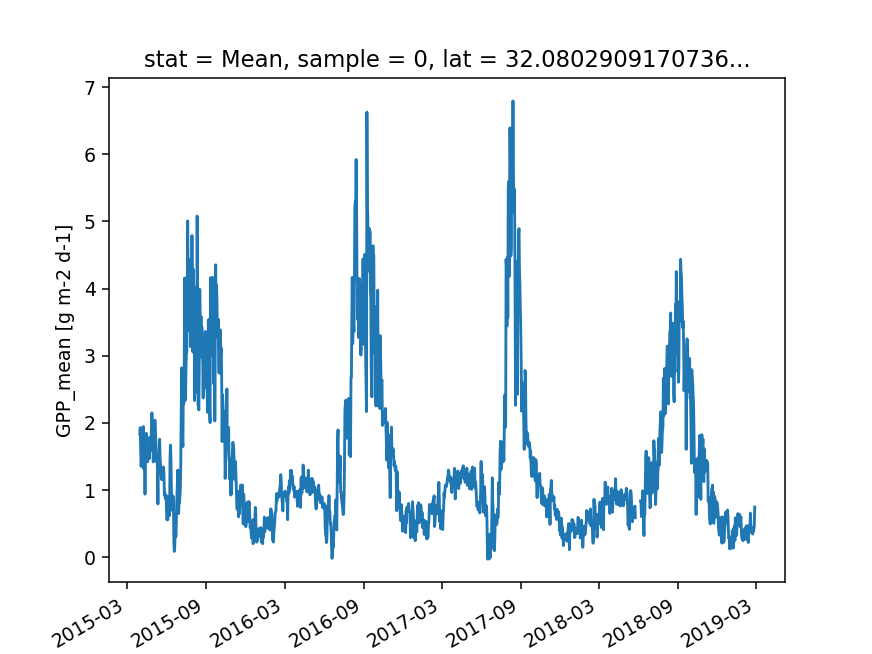

In [30]:
layer0.xr.GPP_mean.sel(dict(stat="Mean", sample=[0])).plot()

<IPython.core.display.Javascript object>


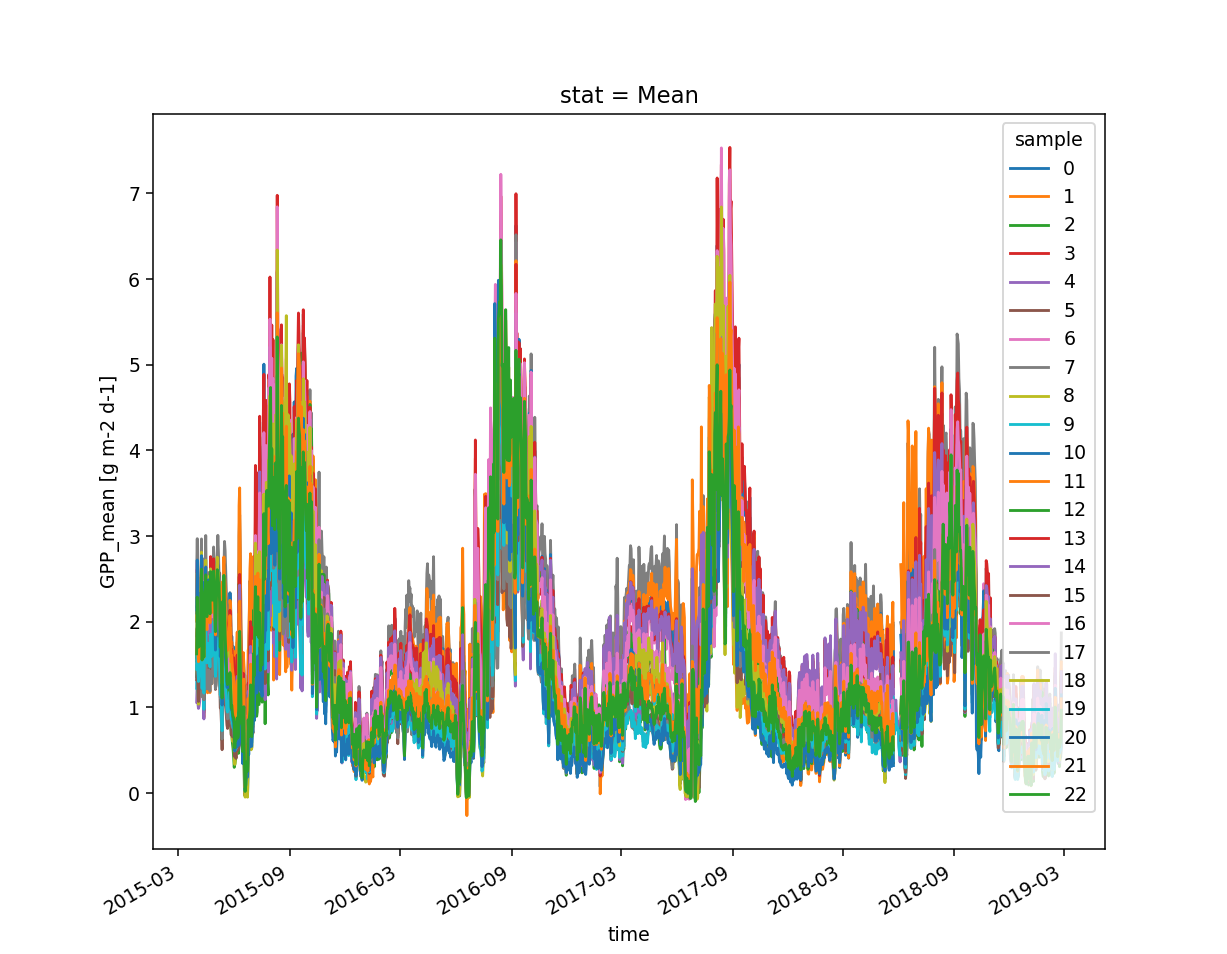

In [43]:
layer0.xr.GPP_mean.sel(dict(stat="Mean")).plot.line(x='time')

In [47]:
pds = layer0.xr
source = list(set([pds[d].attrs["source"] for d in pds]))
stype = list(set([pds[d].attrs["type"] for d in pds]))
soil_zone = list(set([pds[d].attrs["soil_zone"] for d in pds]))
soil_zone = ['surface', 'rootzone']

print(source); print(stype); print(soil_zone)

['AirMOSS', 'SMAP', 'COSMOS', 'CRN', 'SNOTEL', 'SoilSCAPE', 'Daymet', 'GRACE', 'MODIS', 'SCAN']
['spaceborne', 'in situ', 'other', 'airborne']
['surface', 'rootzone']


In [ ]:
dates = layer4.xr.sel(stat="mean").dropna(dim="time", how="all").time.data
dates

In [ ]:
import ipywidgets as wg

dates = layer4.xr.sel(stat="mean").dropna(dim="time", how="all").time.data
dates = dates.astype('M8[D]')
xds = layer4.xr

time_slider = wg.SelectionRangeSlider(
    options=dates, 
    index=(0, len(dates)-1),
    continuous_update=False,
    layout=wg.Layout(width="auto"))

widgets = dict(
    Time=time_slider, 
    By=["None", "year", "month", "week", "day"],
    Zone=['surface', 'rootzone'],
    Mean=True, Min=True, Max=True)

%matplotlib notebook

In [ ]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [12, 5]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


def update(Time, By, Zone, Mean, Min, Max):
    """ """

    stat = [True]*3 if not any([Mean,Min,Max]) else [Mean,Min,Max]
    data = xds.sel(stat=stat)                      # filter by stats
    
    data = data.filter_by_attrs(soil_zone=Zone)    # filter by attributes

    data = data.sel(time=slice(Time[0],Time[1]))   # filter by time;
    
    xaxis = "time" if By == "None" else By         # new plot interval
    if By is not "None":
        data = data.sel(stat="mean")
        data = data.groupby("time."+str(By)).mean()

    ax.clear()                                     # clear plot
    for d in data:                                 # loop over vars
        data[d].plot.line(x=xaxis, ax=ax)          # add line
    fig.canvas.draw()                              # draw 


p = wg.interactive(update, **widgets);
display(p)

In [ ]:
for s in range(layer4.xr.SMAP_surface.sample.size):
    layer4.xr.SMAP_surface.isel(sample=s, stat=0).plot()

In [ ]:

layer4.xr.SMAP_surface.sel(stat=["max"]).plot()

In [ ]:
from bqplot import * 

dt_x = DateScale()
sc_y = LinearScale()

y = layer8.xr.SMAP_surface.sel(sample=0, stat="mean").data
x = layer8.xr.SMAP_surface.sel(sample=0, stat="mean").time

time_series = Lines(x=x, y=y, scales={'x': dt_x, 'y': sc_y})
ax_x = Axis(scale=dt_x, label='Date')
ax_y = Axis(scale=sc_y, orientation='vertical')

Figure(marks=[time_series], axes=[ax_x, ax_y], title='A Time Series Plot')

In [ ]:
ax = plt.figure(1, title='Line Chart')
layer8.xr.SMAP_surface.sel(sample=0, stat="mean")
plt.show()

In [ ]:
dir(fig)

In [ ]:


#Creates just a figure and only one subplot
dir(plt)